<a href="https://colab.research.google.com/github/n-o-r-y/Projects/blob/main/ML_Projects/Classification_of_emails_(spam_or_not_spam).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Classification of emails (spam or not spam) using machine learning algorithms.**
(1 for spam, 0 for not spam)

---



---



# loading Dataset

In [ ]:
import pandas as pd
dataset_path ='/content/drive/MyDrive/9th Semester/SP6/emails.csv'
df = pd.read_csv(dataset_path)
df.head(100)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Email 96,17,15,29,5,8,2,128,3,14,...,0,0,0,0,0,0,0,0,0,0
96,Email 97,8,6,8,0,2,0,48,1,2,...,0,0,0,0,0,0,0,1,0,0
97,Email 98,3,1,1,0,2,0,11,0,0,...,0,0,0,0,0,0,0,0,0,0
98,Email 99,2,1,1,0,1,2,20,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.count()

Email No.     5172
the           5172
to            5172
ect           5172
and           5172
              ... 
military      5172
allowing      5172
ff            5172
dry           5172
Prediction    5172
Length: 3002, dtype: int64

In [ ]:
num_rows, num_columns = df.shape
print(f'Rows:{num_rows}')
print(f'Column:{num_columns}')

Rows:5172
Column:3002


#Data Preprocessing

In [ ]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [ ]:
df.dropna()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


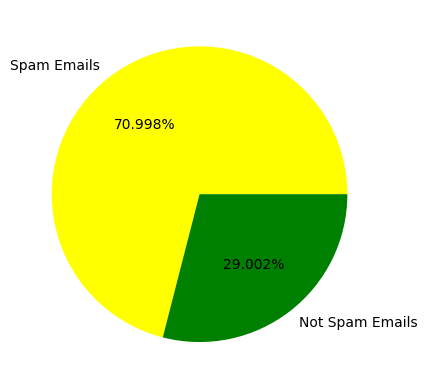

In [ ]:
import matplotlib.pyplot as plt
label=['Spam Emails','Not Spam Emails']
col=['yellow','green']
value=df['Prediction'].value_counts().values.tolist()
plt.pie(value,labels=label,autopct='%1.3f%%',colors=col)
plt.show()

In [ ]:
X = df.drop(columns=["Email No.","Prediction"])
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
Y = df["Prediction"]
Y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

#Min Max Scaller

In [ ]:
from sklearn import preprocessing
min_max_Scaler = preprocessing.MinMaxScaler()
X = min_max_Scaler.fit_transform(X)
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

#Data Split


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#Model Training

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
trainPredict_y = lgr.predict(X_train)
trainAcc = accuracy_score(Y_train,trainPredict_y)
print('Accuracy :',trainAcc*100)

Accuracy : 98.40464104423495


In [ ]:
testPredict_y = lgr.predict(X_test)
testAcc = accuracy_score(Y_test,testPredict_y)
scr1=testAcc*100
print('Accuracy :',scr1)

Accuracy : 95.7487922705314


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,testPredict_y))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       719
           1       0.94      0.91      0.93       316

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



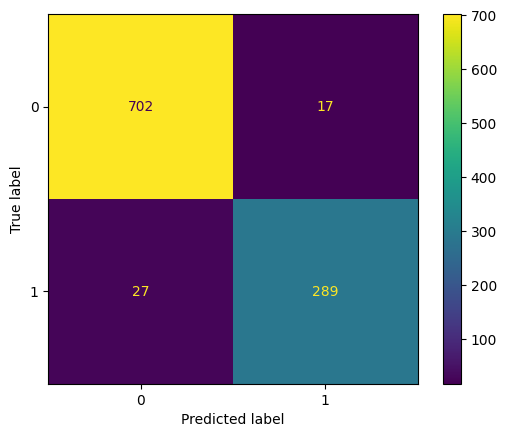

In [ ]:
confusion_matrix_result = confusion_matrix(Y_test, lgr.predict(X_test))
CM = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result)
CM.plot()

In [ ]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
trainPredict_y = dtc.predict(X_train)
trainAcc = accuracy_score(Y_train,trainPredict_y)
print('Accuracy :',trainAcc*100)

Accuracy : 100.0


In [ ]:
testPredict_y = dtc.predict(X_test)
testAcc = accuracy_score(Y_test,testPredict_y)
scr2=testAcc*100
print('Accuracy :',scr2)

Accuracy : 94.4927536231884


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,testPredict_y))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       719
           1       0.89      0.94      0.91       316

    accuracy                           0.94      1035
   macro avg       0.93      0.94      0.94      1035
weighted avg       0.95      0.94      0.95      1035



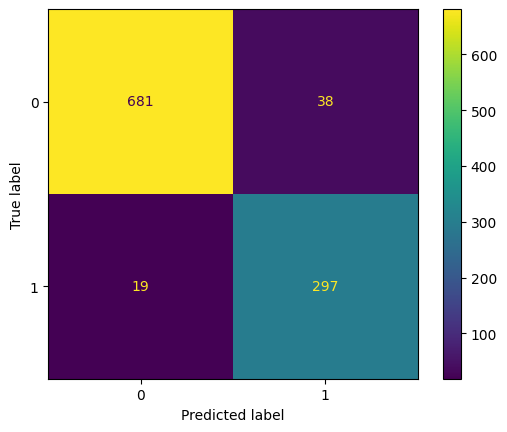

In [ ]:
confusion_matrix_result = confusion_matrix(Y_test, dtc.predict(X_test))
CM = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result)
CM.plot()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
trainPredict_y = rf.predict(X_train)
trainAcc = accuracy_score(Y_train,trainPredict_y)
print('Accuracy :',trainAcc*100)

Accuracy : 100.0


In [ ]:
testPredict_y = rf.predict(X_test)
testAcc = accuracy_score(Y_test,testPredict_y)
scr3=testAcc*100
print('Accuracy :',scr3)

Accuracy : 97.97101449275362


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,testPredict_y))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       719
           1       0.97      0.97      0.97       316

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



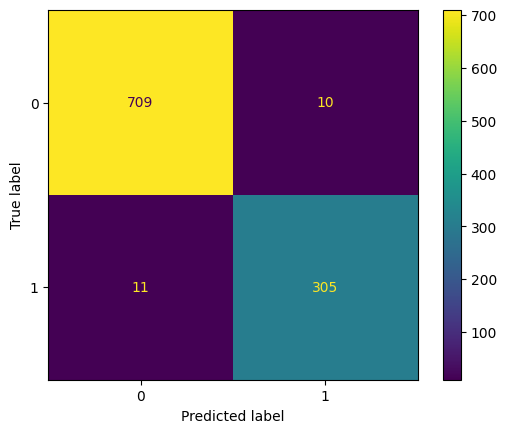

In [ ]:
confusion_matrix_result = confusion_matrix(Y_test, rf.predict(X_test))
CM = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result)
CM.plot()

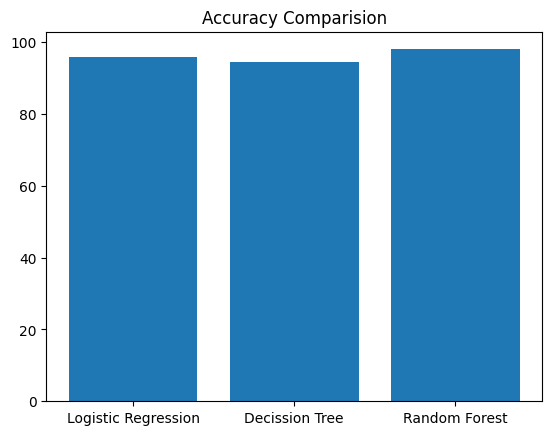

In [ ]:
x=['Logistic Regression','Decission Tree','Random Forest']
y=[scr1,scr2,scr3]
plt.title('Accuracy Comparision')
plt.bar(x,y)
plt.show()